In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
magnus_df = pd.read_pickle("./magnus.pkl")

In [3]:
magnus_df

,opponent,player_color,opponent_rating,player_rating,length,year,opening_moves,opening,opening_variant,result
0,Wesley So,white,2741.0,2881.0,29,2021,1. e4 e5 2. Nf3 Nc6 3. Bb5 Nf6,Ruy López Opening,"Berlin, Rio Gambit Accepted, 5.Re1 Nd6 6.Nxe5",draw
1,Levon Aronian,black,2761.0,2881.0,60,2021,1. e4 e5 2. Nf3 Nc6 3. Bb5 a6,Ruy López Opening,"Morphy Defense, Anti-Marshall Variation, 8......",draw
2,Daniil Dubov,black,2710.0,2847.0,41,2021,1. d4 d5 2. c4 c5 3. Nf3 cxd4,Queen's Gambit Declined,Austrian Variation,win
3,Hikaru Nakamura,black,2736.0,2847.0,39,2021,1. d4 d5 2. c4 e6 3. Nc3 a6,Queen's Gambit Declined,Janowski Variation,win
4,Andrey Esipenko,black,2716.0,2847.0,36,2021,1. e4 e5 2. Nf3 Nc6 3. Bc4 Bc5,Giuoco Piano Game,"Main Line, Giuoco Pianissimo Variation",draw
...,...,...,...,...,...,...,...,...,...,...
3195,Vasilios Kotronias,black,2573.0,2279.0,36,2002,1. e4 c5 2. Nf3 d6 3. d4 cxd4,Sicilian Defense,"Open, Classical, Richter-Rauzer Variation",loss
3196,Tapani Sammalvuo,white,2460.0,2279.0,37,2002,1. d4 Nf6 2. c4 c6 3. Nc3 d5,Semi-Slav Defense,NaN,loss
3197,Aarland Stein Arild,white,2257.0,2279.0,58,2002,1. d4 d5 2. c4 e6 3. Nf3 Nf6,Queen's Gambit Declined,"Harrwitz, Main Line",draw
3198,Olita Rause,white,2234.0,2127.0,64,2002,1. Nf3 d5 2. c4 c6 3. g3 Bg4,English Opening,"Caro-Kann Defensive System, 2.Nf3 d5",loss


In [4]:
magnus_df.groupby('opponent').mean()

,opponent_rating,player_rating,length
opponent,,,
A R Saleh Salem,2638.0,2837.0,62.0
Aarland Stein Arild,2257.0,2279.0,58.0
Abhijeet Gupta,2636.0,2839.0,59.5
Abhijit Kunte,2491.0,2838.0,44.0
Adam Tukhaev,2527.0,2835.0,72.0
...,...,...,...
Zhao Zong-Yuan,2491.0,2714.0,54.0
Ziaur Rahman,2510.0,2786.0,38.0
Zivojin Z Ljubisavljevic,2273.0,2581.0,45.0


In [5]:
magnus_df.describe()

,opponent_rating,player_rating,length
count,3171.000000,3196.000000,3200.000000
mean,2681.164617,2783.596683,45.905000
std,142.501011,113.315140,16.719381
min,1650.000000,2127.000000,5.000000
25%,2638.000000,2733.000000,34.000000
50%,2736.000000,2834.000000,43.000000
75%,2774.000000,2857.000000,55.000000
max,2900.000000,2886.000000,174.000000


In [6]:
mask = magnus_df['opponent'].value_counts()
magnus_df = magnus_df[magnus_df['opponent'].isin(mask.index[mask>1])]

In [7]:
num_magnus_df = magnus_df[magnus_df.describe().columns]

In [8]:
cat_magnus_df = magnus_df[['opponent', 'player_color', 'year', 'opening_moves', 'opening', 'opening_variant', 'result']]

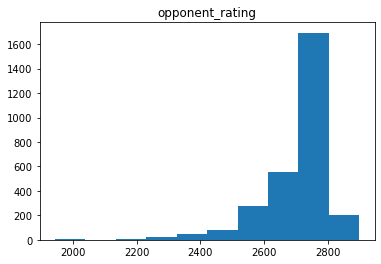

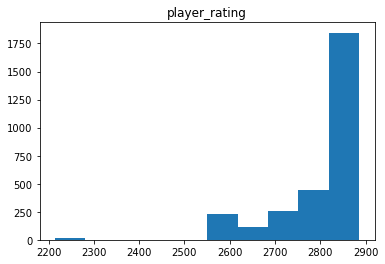

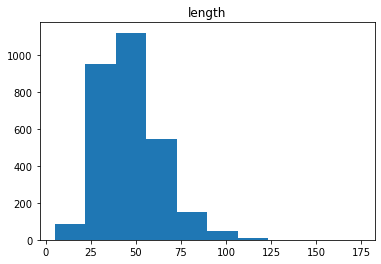

In [9]:
for column in num_magnus_df:
    plt.hist(num_magnus_df[column])
    plt.title(column)
    plt.show()

/Library/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


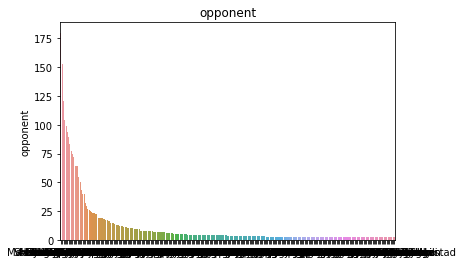

/Library/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


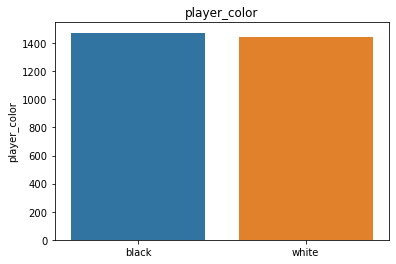

/Library/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


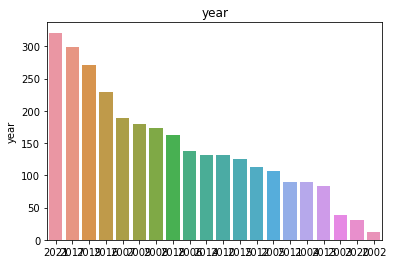

/Library/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


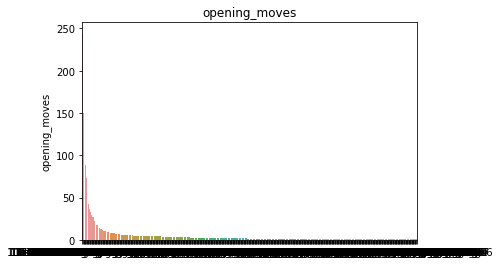

/Library/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


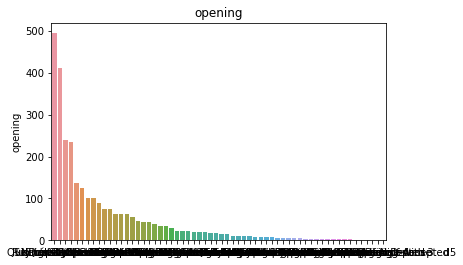

/Library/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


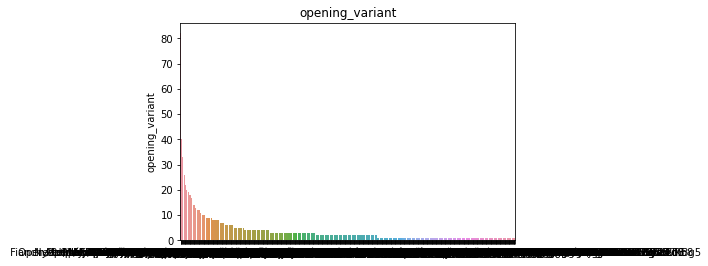

/Library/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


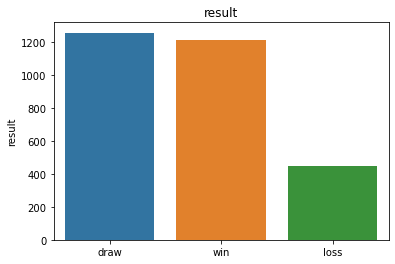

In [10]:
for col in cat_magnus_df.columns:
    sns.barplot(cat_magnus_df[col].value_counts().index, cat_magnus_df[col].value_counts()).set_title(col)
    plt.show()

In [11]:
candidate_list = ['Hikaru Nakamura', 'Teimour Radjabov', 'Jan-Krzysztof Duda', 'Ding Liren', 'Alireza Firouzja', 'Fabiano Caruana', 'Ian Nepomniachtchi', 'Richard Rapport']

for candidate in candidate_list: 
    print(magnus_df[magnus_df['opponent'] == candidate]['opponent'].value_counts())

Hikaru Nakamura    153
Name: opponent, dtype: int64
Teimour Radjabov    77
Name: opponent, dtype: int64
Jan-Krzysztof Duda    13
Name: opponent, dtype: int64
Ding Liren    83
Name: opponent, dtype: int64
Alireza Firouzja    10
Name: opponent, dtype: int64
Fabiano Caruana    75
Name: opponent, dtype: int64
Ian Nepomniachtchi    64
Name: opponent, dtype: int64
Richard Rapport    9
Name: opponent, dtype: int64
